# Modelando la Pandemia

  En este proyecto vamos a estudiar y analizar los datos mundiales de la pandemia COVID-19 usando países modelo de distintas políticas públicas para luego interpretar otras curvas.

Puedes descargar el dataset de casos totales, divididos por país [aquí.](
https://ourworldindata.org/coronavirus-data?country=
) Descarga los datos  formato .csv luego podrás cargarlos en el notebook usando pandas, a partir de eso selecciona los de los países que te interesan, hay un ejemplo de cómo se hace esto en este notebook. 

# ¿Cómo empezó la pandemia?


  La primer parte del trabajo consiste en estudiar cómo se empieza a propagar la pandemia, luego analizaremos las medidas tomadas y su efectividad.

  Al inicio de una pandemia, se estima que los contagios siguen una ley exponencial, esa es la fase de "crecimiento exponencial", luego hay un decaimiento dado por la inmunidad. 

  Los datos de casos confirmados en función del tiempo $C(t)$, pueden aproximarse con el modelo

$C(t)=e^{k(t-t_0)}$

donde $t_0$ es la fecha del primer contagio, y $k$ es un parámetro propio de cada enfermedad, que habla de la contagiosidad. Cuanto mayor es $k$, más grande será el número de casos confirmados dado por la expresión. $k$ depende de el tiempo que una persona enferma contagia, el nivel de infecciosidad del virus y cuántas personas que se pueden contagiar ve una persona enferma por día. Es decir, la circulación. Haciendo cuarententa, $k$ disminuye, con la circulación $k$ aumenta.

  El parámetro $k$ está directamente relacionado con el $R$ del que tanto se habla en los medios. En este proyecto haremos foco en $k$, pero puedes profundizar sobre esto si quieres, empezandó por [aquí](https://es.wikipedia.org/wiki/Ritmo_reproductivo_b%C3%A1sico). 

  Es posible hacer un modelo completo, pero para eso es necesario utilizar ecuaciones diferenciales. Si quieres profundizar sobre eso, busca información sobre "modelo epidemiológico SEIR". Si quieres ver cómo funciona este modelo, puedes empezar por [aquí](http://gabgoh.github.io/COVID/index.html). En ese link está implementado el modelo SEIR (no es necesario entender las ecuaciones en este caso) y el rol que cumplen los parámetros, puedes explorar el impacto de variar $R$ y el resto de los valores para ver cómo impactan en la cirva de contagios. Ahora utilizaremos la siguiente expresión para describir únicamente la etapa de crecimiento exponencial.


  Comienza estudiando cómo se distribuyó el $k$ inicial de la pandemia y si es posible elaborar un intervalo de confianza razonable para este valor. Para eso 
  
  1. Elegir diez países del norte (ahí empezó la pandemia) y puedes mide el valor de $k$ inicial de la pandemia, analizando datos del primer tramo.

  2. Analiza si es posible estimar la evolución mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para $k$ a partir de los que obtuviste y así generar un modelo nuevo, basado en la distribución de $k$. Luego compara el modelo con los datos mundiales.

3. Piensa qué significa que el modelo de "bien" o dé "mal" ¿qué indicadores de esto existen?. Luego discute en el informe por qué crees que dio así. Recuerda que es importante elegir bien la población de muestra. Piensa qué criterios puedes elegir para representar bien la población mundial que se contagió al inicio de la pandemia.
 
 # Evaluando estrategias

 Ahora que tienes una manera de obtener información de las curvas, puedes intentar evaluar las estrategias de acción y el comportamiento de las poblaciones, construyendo un clasificador binario. 
1. Elige una categoría binaria que hable de políticas públicas elegidas por los países para enfrentar la pandemia que te interese estudiar, como pueden ser "la población hizo cuarententa" o "la población se vacunó".
2. Piensa qué indicadores de la curva pueden hablar del éxito de la política que quieres estudiar. Por ejemplo, si se tratase de evaluar el éxito de una cuarentena podría ser porcentaje de población  que se contagió o variación del valor de $k$ a partir de que se empezó a implementar esa medida. Elige al menos 3 indicadores.
3. Investiga sobre países que hayan aplicado o no esa política pública, para generar una base de datos. Por ejemplo, Brasil no hizo cuarentena y China hizo una muy estricta. Recuerda hacer una selección inteligente de la porción de datos de la curva de cada país que vas a analizar.
4. Construye un clasificador binario a partir de una regresión logística o usando Naive Bayes para intentar analizar la estrategia de otros países y ver si es posible predecirla a partir de la curva de contagios y el clasificador. Un posible clasificador binario es uno que clasifique el porcentaje de contagios en función da las categorías "la población hizo cuarentena" y "la población n hizo cuarentena". Haz esto para los 3 indicadores que elegiste en el punto 3 y compara los resultados.
5. Elabora un informe con lo que hayas aprendido a lo largo de este proyecto, donde discutas la utilidad o no de los indicadores que elegiste y del análisis estadístico propuesto.

#¡Comencemos!

  A continuación dejamos un ejemplo de cómo extraer el $k$ inicial de Argentina, usando un ajuste de cuadrados mínimos. Si necesitas los datos mundiales, en la columna de países aparecen como "World".



In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
from matplotlib import cm
#from google.colab import drive
from scipy.optimize import curve_fit
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.simplefilter("ignore")

In [2]:
#cargamos los datos

#drive.mount('/content/gdrive', force_remount=True)

# Aca deben apuntar a la carpeta de su drive donde guardaron los datos
#root_dir = "/content/gdrive/My Drive/datos_acamica"


## EXPLORACION DE DATOS Y MEDICION DE K

A. Explora la fuente de datos: ¿que representa el dataset? ¿Hay información sobre las columnas?

In [3]:
#Comenzamos abriendo el dataset
datos=pd.read_csv('C:/Users/juan_/Desktop/Acamica/Sprint4/Data_covid.csv')
datos

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
0,Afghanistan,AFG,2020-03-23,NaN,NaN,1.0,40.0
1,Afghanistan,AFG,2020-03-24,NaN,NaN,1.0,42.0
2,Afghanistan,AFG,2020-03-25,NaN,NaN,1.0,74.0
3,Afghanistan,AFG,2020-03-26,NaN,NaN,2.0,80.0
4,Afghanistan,AFG,2020-03-27,NaN,NaN,2.0,91.0
...,...,...,...,...,...,...,...
135119,Zimbabwe,ZWE,2020-09-05,NaN,NaN,206.0,6837.0
135120,Zimbabwe,ZWE,2021-12-05,NaN,NaN,4710.0,139046.0
135121,Zimbabwe,ZWE,2020-03-20,NaN,NaN,NaN,1.0
135122,Zimbabwe,ZWE,2020-03-21,NaN,NaN,NaN,3.0


In [4]:
print('La cantidad de filas son:' + str(datos.shape[0]))
print('La cantidad de columnas son:' + str(datos.shape[1]))

La cantidad de filas son:135124
La cantidad de columnas son:7


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135124 entries, 0 to 135123
Data columns (total 7 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Entity                                  135124 non-null  object 
 1   Code                                    122592 non-null  object 
 2   Day                                     135124 non-null  object 
 3   total_tests                             59756 non-null   float64
 4   142601-annotations                      57980 non-null   object 
 5   Total confirmed deaths due to COVID-19  121761 non-null  float64
 6   Total confirmed cases of COVID-19       133284 non-null  float64
dtypes: float64(3), object(4)
memory usage: 7.2+ MB


In [6]:
#Vemos las columnas
datos.columns

Index(['Entity', 'Code', 'Day', 'total_tests', '142601-annotations',
       'Total confirmed deaths due to COVID-19',
       'Total confirmed cases of COVID-19'],
      dtype='object')

In [7]:
#Vemos cuantos valores nan tiene cada columna
datos.isna().sum()

Entity                                        0
Code                                      12532
Day                                           0
total_tests                               75368
142601-annotations                        77144
Total confirmed deaths due to COVID-19    13363
Total confirmed cases of COVID-19          1840
dtype: int64

In [8]:
print('La cantidad de paises es',len(datos['Entity'].unique())) #vemos cuantos nombres de paises diferentes hay
print()
print(datos['Entity'].unique()) #preguntar

La cantidad de paises es 215

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Asia' 'Asia excl. China'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Canada, people tested' 'Cape Verde' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Democratic Republic of Congo'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European Union' 'Fiji' 'Finland' 'France' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'High income' 'Honduras'
 'Hong Kong' '

In [9]:
#datos.loc[datos['Entity'] == 'China'].head(10)

Elegimos algunos países y vemos la fecha en que comienzan a contabilizarse los casos confirmados de COVID-19 y a la vez podemos ver la cantidad total de muertes confirmadas y el total de casos confirmados. Conocer esta fecha podría servirnos mas adelante para el análisis de los resultados obtenidos y obtener mejores conclusiones.

In [10]:
datos.loc[datos['Entity'] == 'Argentina'].head(5)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
4515,Argentina,ARG,2020-01-01,4.0,tests performed,NaN,NaN
4516,Argentina,ARG,2020-01-02,53.0,tests performed,NaN,NaN
4517,Argentina,ARG,2020-01-03,58.0,tests performed,NaN,NaN
4518,Argentina,ARG,2020-01-04,133.0,tests performed,NaN,NaN
4519,Argentina,ARG,2020-01-05,146.0,tests performed,NaN,NaN


In [11]:
datos.loc[datos['Entity'] == 'United States'].head(5)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
125550,United States,USA,2020-03-01,348.0,tests performed,1.0,32.0
125551,United States,USA,2020-03-02,861.0,tests performed,6.0,55.0
125552,United States,USA,2020-03-03,1479.0,tests performed,7.0,74.0
125553,United States,USA,2020-03-04,2364.0,tests performed,11.0,107.0
125554,United States,USA,2020-03-05,3565.0,tests performed,12.0,184.0


In [12]:
(datos.loc[datos['Entity'] == 'Brazil'].head(5))

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
16849,Brazil,BRA,2020-04-26,179698.0,tests performed,4286.0,63100.0
16850,Brazil,BRA,2020-04-27,187145.0,tests performed,4603.0,67446.0
16851,Brazil,BRA,2020-04-28,189730.0,tests performed,5083.0,73235.0
16852,Brazil,BRA,2020-04-29,194407.0,tests performed,5513.0,79685.0
16853,Brazil,BRA,2020-04-30,237903.0,tests performed,6006.0,87187.0


In [13]:
(datos.loc[datos['Entity'] == 'Italy'].head(5))

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
58469,Italy,ITA,2020-02-24,4324.0,tests performed,7.0,229.0
58470,Italy,ITA,2020-02-25,8623.0,tests performed,10.0,322.0
58471,Italy,ITA,2020-02-26,9587.0,tests performed,12.0,453.0
58472,Italy,ITA,2020-02-27,12014.0,tests performed,17.0,655.0
58473,Italy,ITA,2020-02-28,15695.0,tests performed,21.0,888.0


In [14]:
datos.loc[datos['Entity'] == 'China'].head(5)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
24884,China,CHN,2020-06-24,90000000.0,tests performed,4634.0,83494.0
24885,China,CHN,2020-08-06,160000000.0,tests performed,4634.0,84611.0
24886,China,CHN,2020-01-22,NaN,NaN,17.0,548.0
24887,China,CHN,2020-01-23,NaN,NaN,18.0,641.0
24888,China,CHN,2020-01-24,NaN,NaN,26.0,918.0


Las dos primeras instancias de China no tienen mucho sentido, ya sea por la fecha como por la cantidad de muertes y casos. Sería conveniente no tenerlas en cuenta para los analísis que se hagan.

In [15]:
datos.loc[datos['Entity'] == 'Germany'].head(5)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
44835,Germany,DEU,2020-03-15,129291.0,tests performed,11.0,5795.0
44836,Germany,DEU,2020-03-22,503825.0,tests performed,94.0,24873.0
44837,Germany,DEU,2020-03-29,881424.0,tests performed,533.0,62095.0
44838,Germany,DEU,2020-04-05,1299070.0,tests performed,1584.0,100123.0
44839,Germany,DEU,2020-04-12,1682764.0,tests performed,3022.0,127854.0


Para el caso de Alemania, podemos observar que cada dato o instancia corresponde a una semana de datos (7 días)

In [16]:
datos.loc[datos['Entity'] == 'Sweden'].head(5)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
115164,Sweden,SWE,2020-03-10,NaN,NaN,1.0,424.0
115165,Sweden,SWE,2020-03-11,NaN,NaN,1.0,620.0
115166,Sweden,SWE,2020-03-12,NaN,NaN,2.0,771.0
115167,Sweden,SWE,2020-03-13,NaN,NaN,3.0,923.0
115168,Sweden,SWE,2020-03-14,NaN,NaN,5.0,994.0


In [17]:
datos.loc[datos['Entity'] == 'Spain'].head(5)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
112375,Spain,ESP,2020-04-13,930230.0,tests performed,17756.0,170099.0
112376,Spain,ESP,2020-04-23,1035522.0,tests performed,22157.0,213024.0
112377,Spain,ESP,2020-04-30,1351130.0,tests performed,24543.0,213435.0
112378,Spain,ESP,2020-05-07,1625211.0,tests performed,26070.0,221447.0
112379,Spain,ESP,2020-05-14,1919411.0,tests performed,27321.0,229540.0


In [18]:
datos.loc[datos['Entity'] == 'South Korea'].head(5)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
111080,South Korea,KOR,2020-01-21,11.0,people tested,NaN,NaN
111081,South Korea,KOR,2020-01-22,16.0,people tested,NaN,1.0
111082,South Korea,KOR,2020-01-24,25.0,people tested,NaN,2.0
111083,South Korea,KOR,2020-01-26,48.0,people tested,NaN,3.0
111084,South Korea,KOR,2020-01-27,57.0,people tested,NaN,4.0


In [19]:
datos.loc[datos['Entity'] == 'Norway'].head(5)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
88898,Norway,NOR,2020-04-01,3934.0,people tested,44.0,4863.0
88899,Norway,NOR,2020-04-02,7493.0,people tested,50.0,5147.0
88900,Norway,NOR,2020-04-03,11051.0,people tested,59.0,5370.0
88901,Norway,NOR,2020-04-04,12440.0,people tested,62.0,5550.0
88902,Norway,NOR,2020-04-05,13560.0,people tested,71.0,5687.0


In [20]:
datos.loc[datos['Entity'] == 'Australia'].head(5)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
7217,Australia,AUS,2020-03-22,143056.0,tests performed,7.0,1549.0
7218,Australia,AUS,2020-03-29,211261.0,tests performed,16.0,3984.0
7219,Australia,AUS,2020-04-05,297154.0,tests performed,35.0,5687.0
7220,Australia,AUS,2020-04-06,302663.0,tests performed,40.0,5797.0
7221,Australia,AUS,2020-04-07,310700.0,tests performed,45.0,5895.0


B. Realiza un analisis exploratorio que incluya:

-Tomar datos de un pais en particular

-Seleccionar la primer etapa de crecimiento exponencial de la curva

-Extraer el k de crecimiento exponencial y comparar el modelo con los datos reales para distintos países

-Generar un intervalo de confianza para el valor k midiéndolo para varios paises, con el objetivo de respresentar la población mundial con la selección que hagas.

In [21]:
paises=datos['Entity'] #cargo el vector de paises
confirmados=datos['Total confirmed cases of COVID-19'] #carga vector todos los casos confirmados

In [22]:
confirmados.isna().sum() #vemos cuantos valores nan tiene la variable creada de casos confirmados

1840

In [23]:
#Reemplazamos los valores nan por un numero cercano a 0 para poder trabajar
confirmados = confirmados.fillna(0.001)

In [24]:
confirmados.isna().sum()

0

# WORLD

Comenzamos analizando como es el comportamiento del COVID-19 según los datos que presenta el mundo:

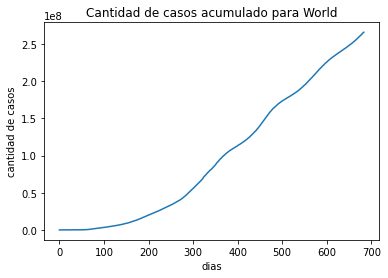

In [25]:
#Analizamos el periodo completo
ind_world=np.where(paises=='World')
ind_world=ind_world[0]
casos_world=confirmados[ind_world]
dias_world=np.arange(0,len(casos_world))
plt.plot(dias_world,casos_world)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Cantidad de casos acumulado para World')
plt.show()

In [26]:
#hacemos un describe para ver un resumen de los datos del mundo
print(casos_world.describe())

count    6.840000e+02
mean     9.879695e+07
std      8.751686e+07
min      5.570000e+02
25%      1.267663e+07
50%      8.187582e+07
75%      1.779992e+08
max      2.658641e+08
Name: Total confirmed cases of COVID-19, dtype: float64


In [27]:
confirmados.isna().sum() #vemos cuantos valores nan tiene la variable creada de casos confirmados

0

Esta es la curva de casos totales del mundo "World". Aquí no se ven las olas, ya que estas se ven en la curva de casos confirmados por día, es decir, de casos nuevos. Esta habla de los acumulados, entonces siempre se agregan.

Para ver mejor la curva, podemos tomar el logartimo de los datos. Una curva exponencial se ve lineal en escala logarítmica

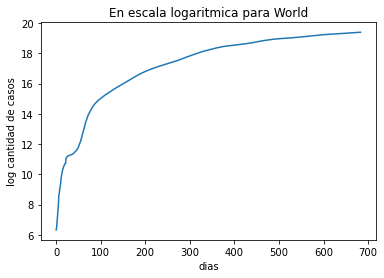

In [28]:
plt.plot(dias_world,np.log(casos_world))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('En escala logaritmica para World')
plt.show()

Veamos desde el dia 100 hasta el 220, ya que son los que pareciera donde hay una primera etapa de crecimiento exponencial.

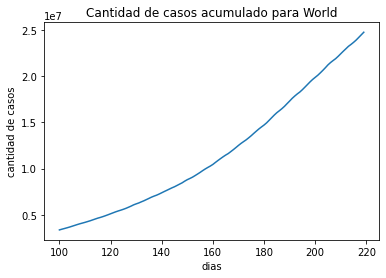

In [29]:
casos_ppio_world=casos_world[100:220]
dias_ppio_world=dias_world[100:220]

plt.plot(dias_ppio_world,casos_ppio_world)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Cantidad de casos acumulado para World')
plt.show()

Es difícil determinar si esta parte es exponencial. Analicemos qué pasa en escala logarítmica.

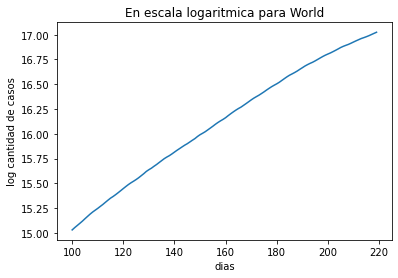

In [30]:
plt.plot(dias_ppio_world,np.log(casos_ppio_world))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('En escala logaritmica para World')
plt.show()

¡Se ve bastante lineal! Aprovechemos esto para averiguar el  𝑘  utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo

𝐶𝑜𝑛𝑓𝑖𝑟𝑚𝑎𝑑𝑜𝑠=𝑒𝑘(𝑡−𝑡0)

In [31]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [32]:
#ajustamos con curve fit
#curve fit devuelve como popt los valores de k y t0 que hacen que mi funcion, en este caso exponencial, se ajuste mejor a los puntos
#curve fit tambien devuelve como pcov, la matriz de covarianza que nos va decir que tan bien se ajusta esa funcion a nuestros datos
#maxfev le tuve que aumentar por la cantidad de iteraciones para que no me de error

popt, pcov = curve_fit(exponencial, dias_ppio_world, casos_ppio_world, maxfev=2000) #con instancias que son valores nan, la funcion exponencial no corre
print('valores popt',popt)
print('valores pcov',pcov)

valores popt [ 1.57244958e-02 -8.67333525e+02]
valores pcov [[1.65571055e-08 1.11388329e-03]
 [1.11388329e-03 7.49812731e+01]]


Veamos cómo se ajusta lo que obtuvimos a los datos reales

Valor de k para World: 0.015724495833072432


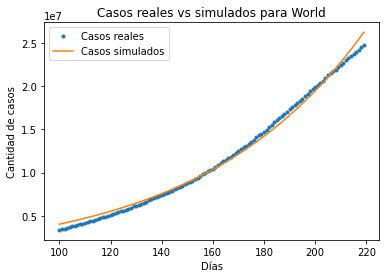

In [33]:
k_world=popt[0]
t0_world=popt[1]
casos_simu_world=exponencial(dias_ppio_world,k_world,t0_world)
plt.plot(dias_ppio_world,casos_ppio_world,'.')
plt.plot(dias_ppio_world,casos_simu_world)
plt.legend(['Casos reales', 'Casos simulados'])
plt.xlabel('Días')
plt.ylabel('Cantidad de casos')
plt.title('Casos reales vs simulados para World')
print("Valor de k para World:", k_world)

Como última pista, hagamos una función que determine los casos nuevos por día a partir de estas curvas. Puede ser útil para tu análisis.

In [34]:
def casos_nuevos(casos):
  nuevos=np.zeros(len(casos))
  i=0
  while i<len(nuevos)-1:
    nuevos[i]=casos[i+1]-casos[i]
    i=i+1

  return nuevos   

Text(0, 0.5, 'Cantidad de casos')

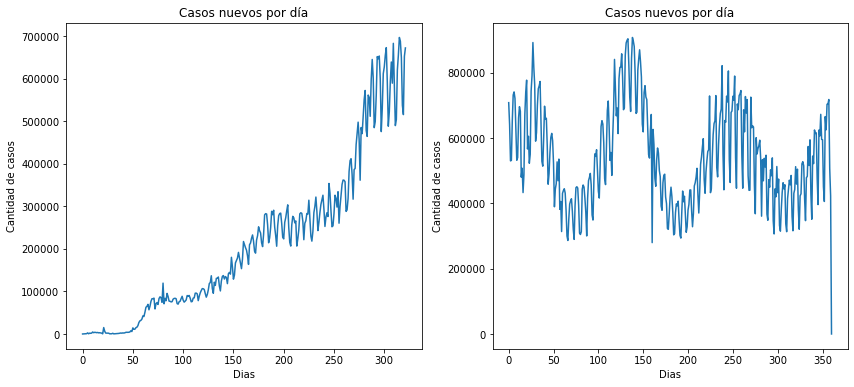

In [35]:
casos_world=np.array(casos_world)
nuevos_world=casos_nuevos(casos_world)

plt.figure(figsize = (14,6))

plt.subplot(1,2,1)
plt.plot(nuevos_world[0:322])
plt.title('Casos nuevos por día')
plt.xlabel("Dias")
plt.ylabel("Cantidad de casos")

plt.subplot(1,2,2)
plt.plot(nuevos_world[323:684])
plt.title('Casos nuevos por día')
plt.xlabel("Dias")
plt.ylabel("Cantidad de casos")

A partir de los datos de 'World', que muestran que la primer etapa de crecimiento exponencial se da entre el dia 100 y 220 desde el comienzo de toma de datos, entonces utilizamos ese mismo periodo para evaluar otros paises de manera individual.

In [36]:
#Hacemos un for para no tener que copiar el código para cada pais.
#pais = ['Argentina', 'United States', 'Brazil', 'Italy', 'China', 'Sweden', 'Spain', 'South Korea', 'Norway', 'Australia']
#dia_inicio = 100
#dia_fin = 220

#for i in pais:
#    ind=np.where(paises==i)
#    ind=ind[0]
#    casos=confirmados[ind]
#    dias=np.arange(0,len(casos))
#    casos_principio = casos[dia_inicio:dia_fin]
#    dias_principio = dias[dia_inicio:dia_fin]
    
    #Definimos el tamaño de los graficos
#    plt.figure(figsize = (20,8))
    
#    plt.subplot(2,4,1)
#    plt.plot(dias,casos)
#    plt.title(i)
#    plt.xlabel('dias')
#    plt.ylabel('cantidad de casos')

#    plt.subplot(2,4,2)
#    plt.plot(dias,np.log(casos))
#    plt.title(i)
#    plt.xlabel('dias')
#    plt.ylabel('log cantidad de casos')

#    plt.subplot(2,4,3)
#    plt.plot(dias_principio,casos_principio)
#    plt.title(i)
#    plt.xlabel('dias')
#    plt.ylabel('cantidad de casos')

#    plt.subplot(2,4,4)
#    plt.plot(dias_principio,np.log(casos_principio))
#    plt.title(i)
#    plt.xlabel('dias')
#    plt.ylabel('log cantidad de casos')

Ahora probamos otra forma de hacerlo, comenzamos definiendo una función:

In [37]:
def casos_covid(pais,dia_inicio, dia_fin):
    ind=np.where(paises==pais)
    ind=ind[0]
    casos=confirmados[ind]
    dias=np.arange(0,len(casos))
    casos_principio = casos[dia_inicio:dia_fin]
    dias_principio = dias[dia_inicio:dia_fin]

    #Este primer gráfico muestra la cantidad de casos acumulados para todo el periodo 
    plt.figure(figsize = (20,8))
    plt.subplot(2,4,1)
    plt.plot(dias,casos)
    plt.title(pais)
    plt.xlabel('dias')
    plt.ylabel('cantidad de casos')
    #Este segundo gráfico muestra el logaritmo de los casos para todo el periodo
    plt.subplot(2,4,2)
    plt.plot(dias,np.log(casos))
    plt.title(pais)
    plt.xlabel('dias')
    plt.ylabel('log cantidad de casos')
    #Este tercer gráfico muestra la cantidad de casos acumulados pero para el periodo seleccionado de 120 días.
    plt.subplot(2,4,3)
    plt.plot(dias_principio,casos_principio)
    plt.title(pais)
    plt.xlabel('dias')
    plt.ylabel('cantidad de casos')
    #Este cuarto gráfico muestra el logaritmo de los casos pero para el periodo seleccionado de 120 días. 
    plt.subplot(2,4,4)
    plt.plot(dias_principio,np.log(casos_principio))
    plt.title(pais)
    plt.xlabel('dias')
    plt.ylabel('log cantidad de casos')

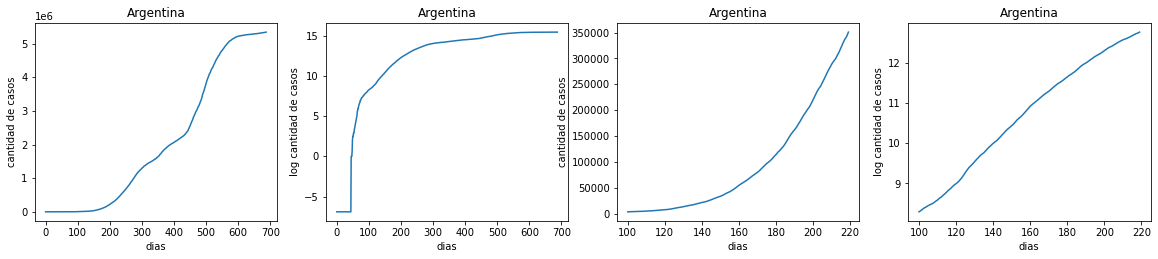

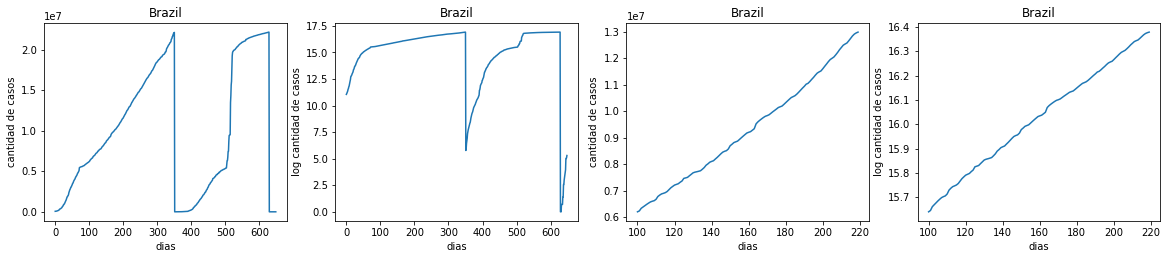

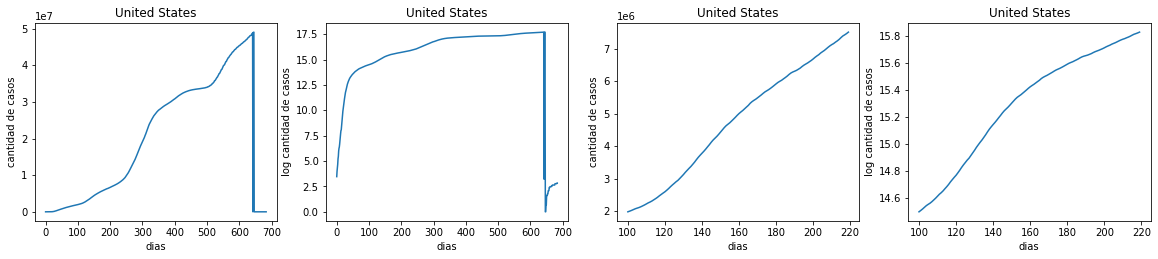

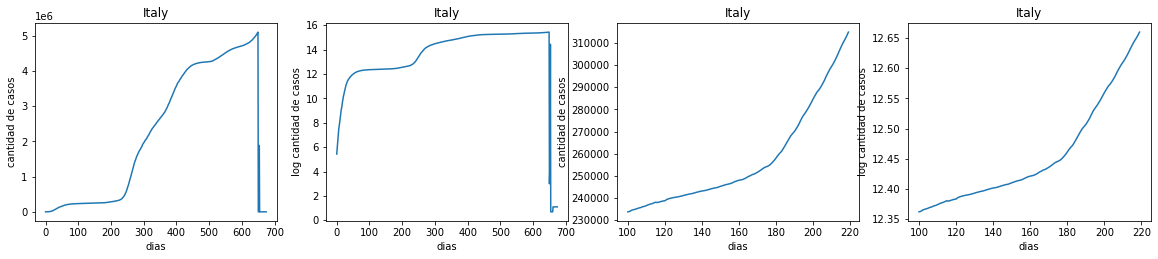

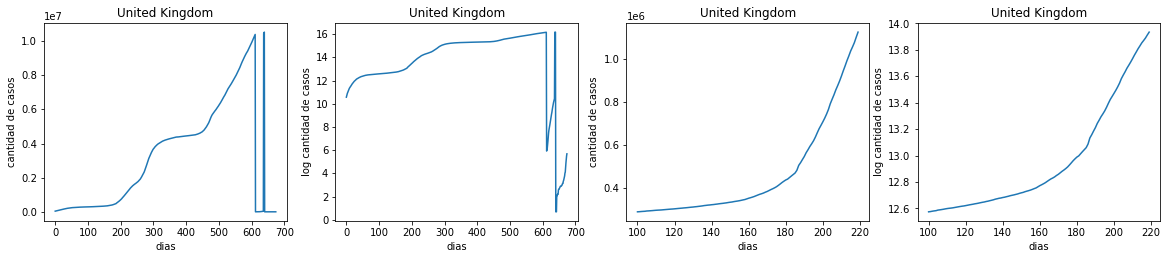

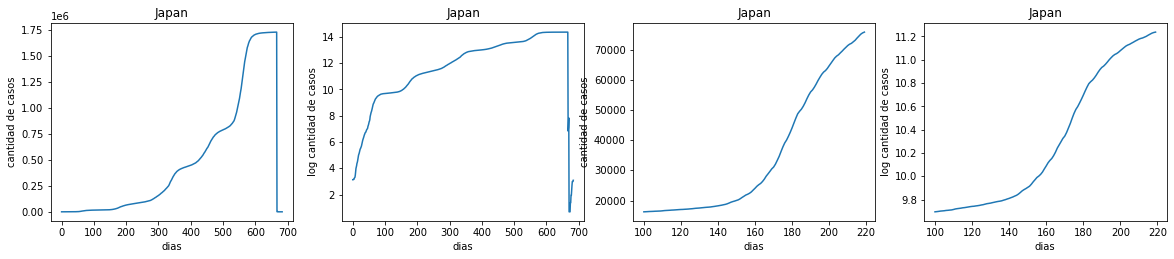

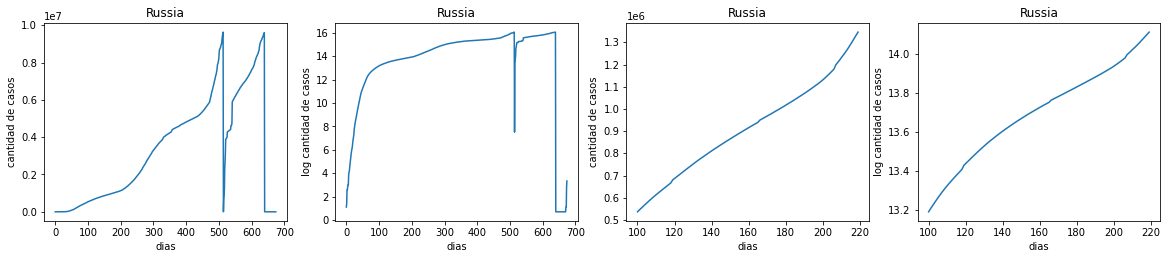

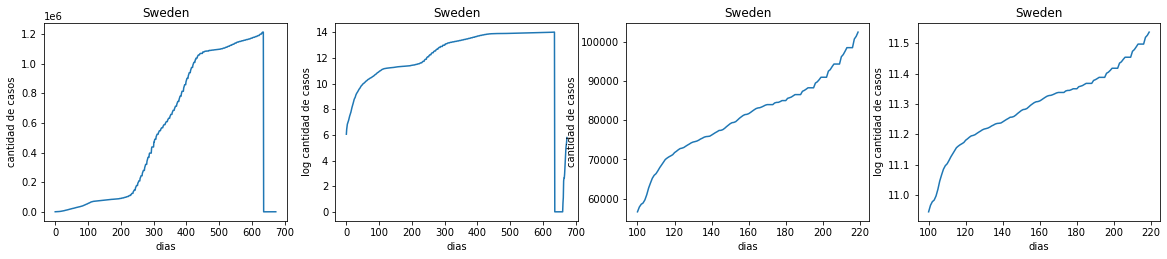

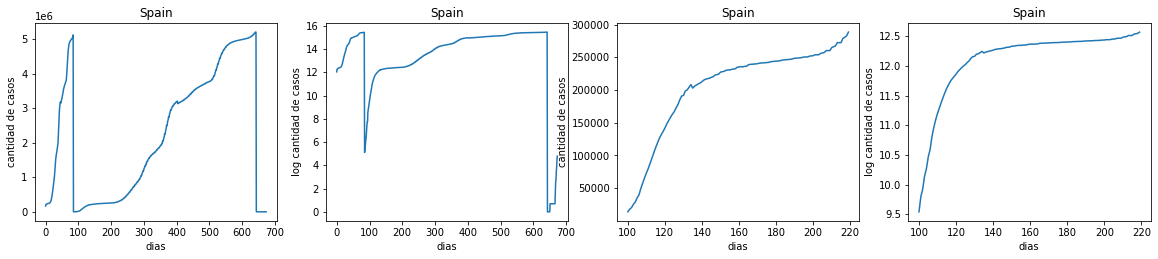

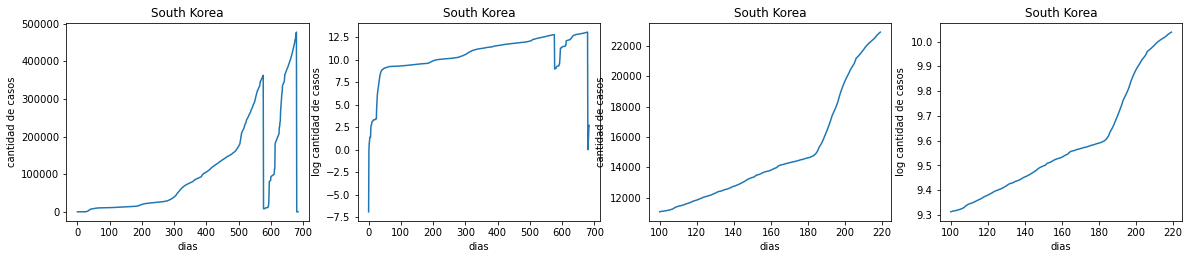

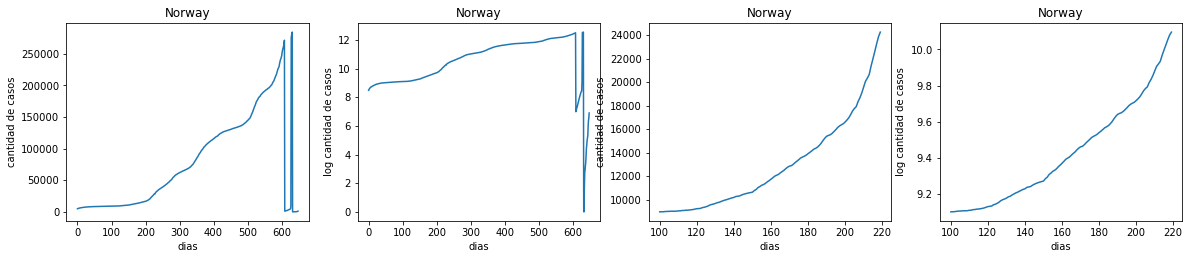

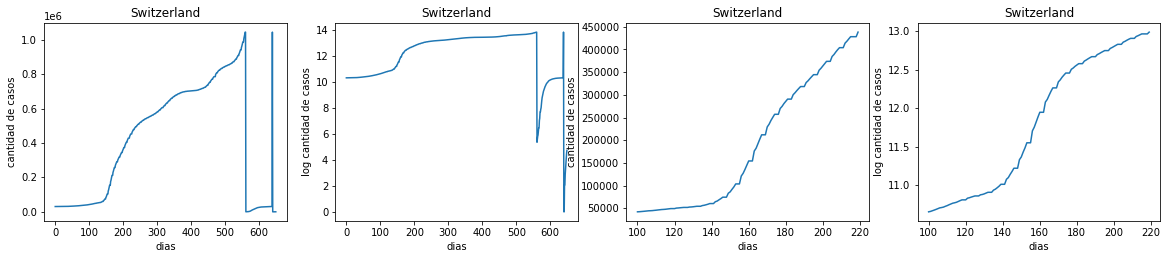

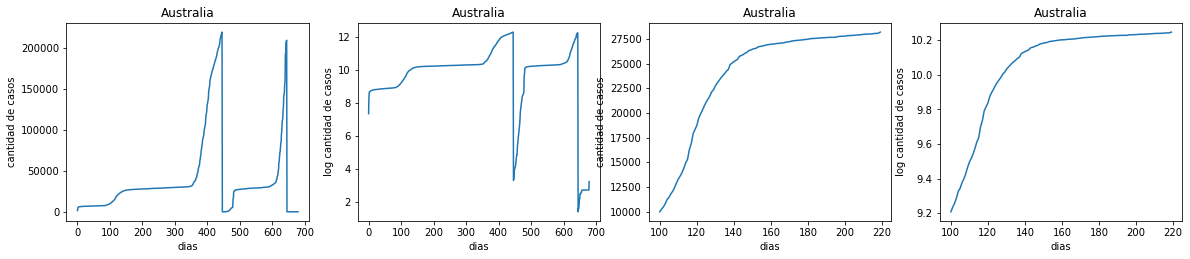

In [38]:
paisess= ['Argentina', 'Brazil', 'United States', 'Italy', 'United Kingdom', 'Japan', 'Russia', 'Sweden', 'Spain', 'South Korea',
          'Norway', 'Switzerland', 'Australia']

for i in paisess:
    casos_covid(i, 100, 220)

Luego de observar de los gráficos de cada pais para el periodo seleccionado de 120 días (para todos los países fue el mismo), podemos concluir que Argentina podría tener un crecimiento exponencial en la cantidad de casos, ya que el gráfico de función logaritmica para el periodo seleccionado pareciera tomar una forma lineal, tambien se puede ver los mismo en Estados Unidos, Noruega y Brasil. Para los restantes países se podría concluir que para ese periodo de tiempo, no presentan un crecimiento exponencial en la curva de casos confirmados, o por lo menos no queda tan claro.

Ahora probamos si la curva de casos confirmados tiene un crecimiento exponencial para los mismos países seleccionados anteriormente pero durante un periodo de tiempo diferente, entre los 20 y 80 días posteriores a la toma de datos:

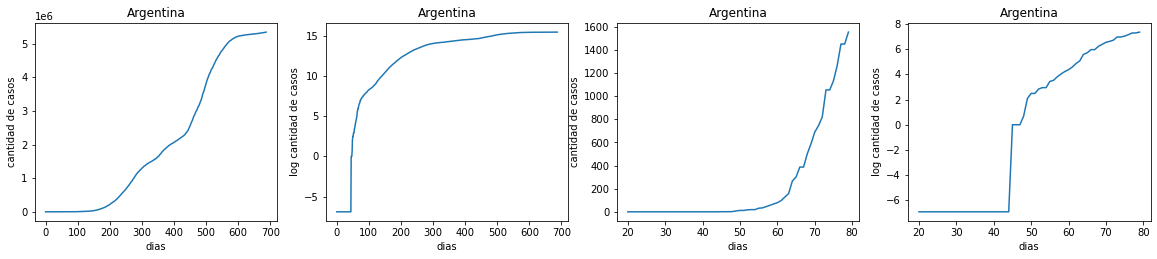

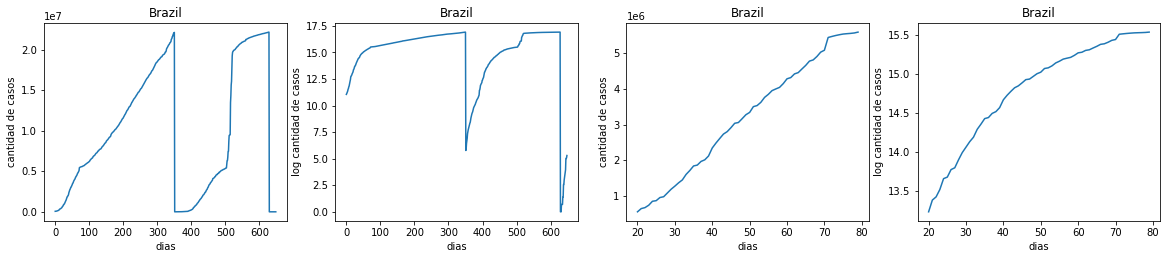

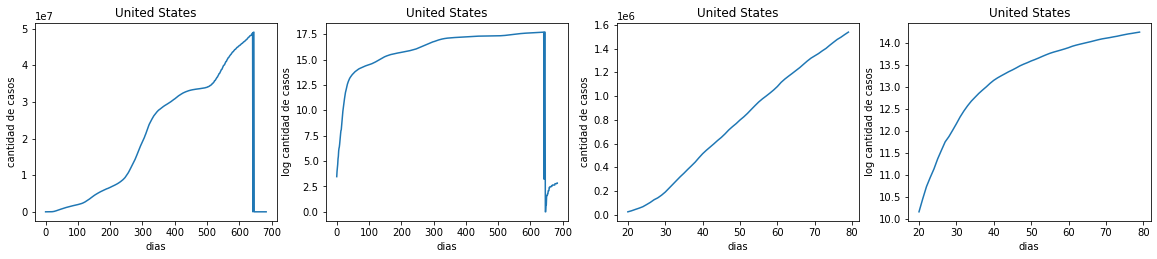

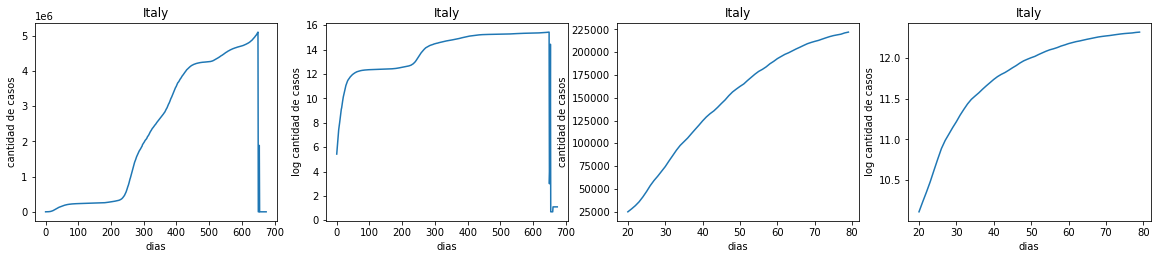

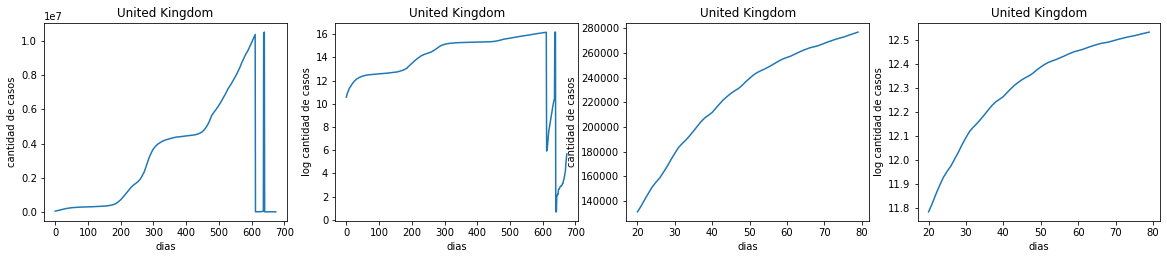

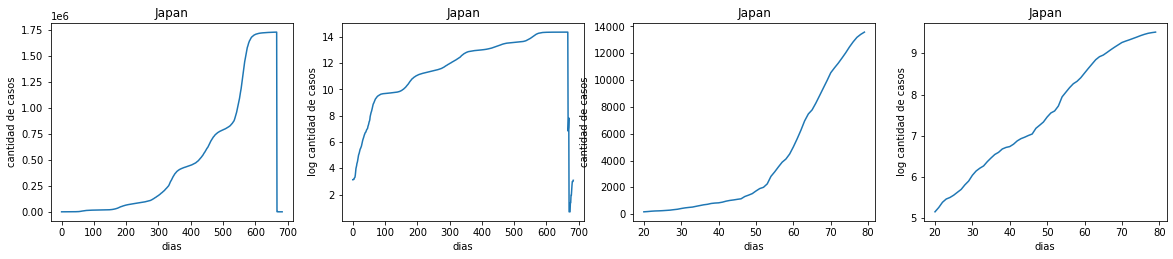

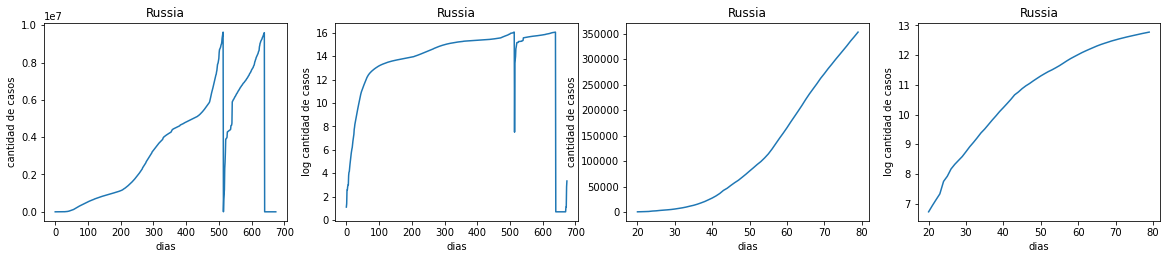

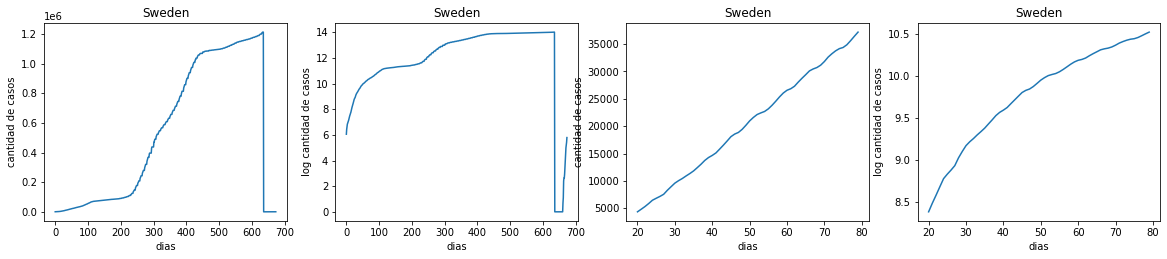

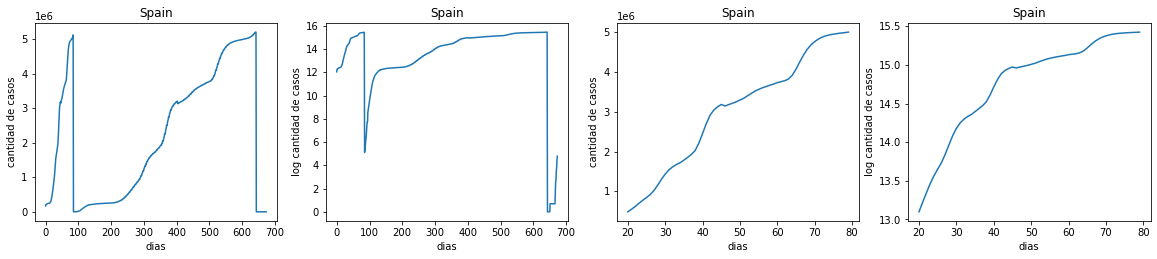

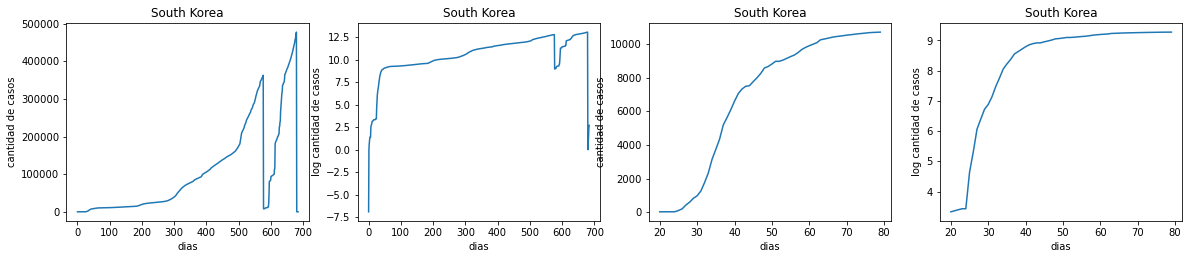

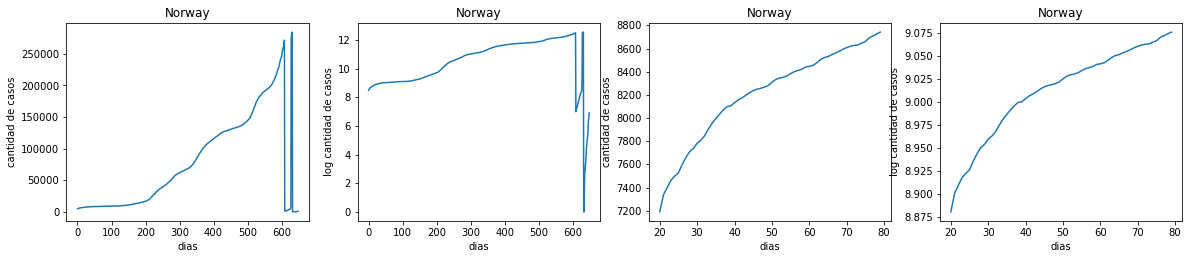

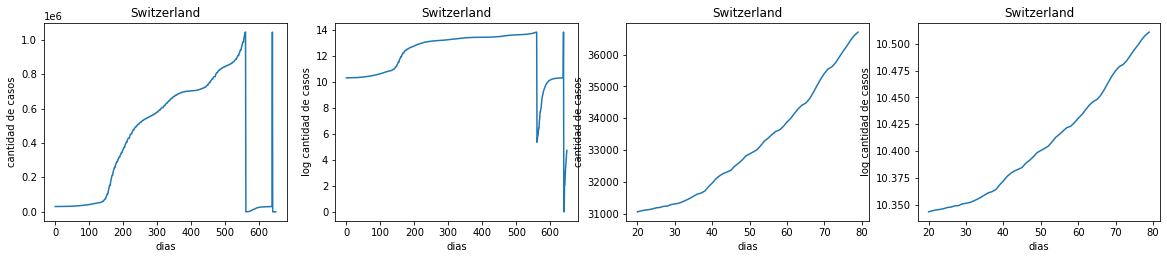

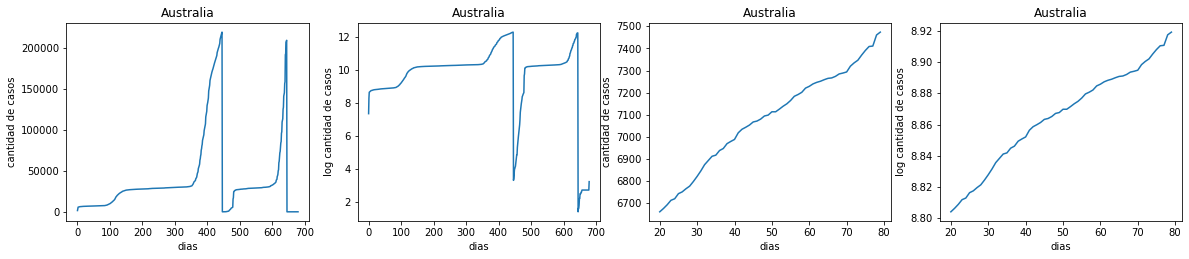

In [39]:
paisess= ['Argentina', 'Brazil', 'United States', 'Italy', 'United Kingdom', 'Japan', 'Russia', 'Sweden', 'Spain', 'South Korea',
          'Norway', 'Switzerland', 'Australia']

for i in paisess:
    casos_covid(i, 20, 80)

Al modificar el periodo de tiempo para el análisis de los datos y en busca de ver si hay una primer etapa de crecimiento exponencial, se puede observar como se modifican los gráficos, esto se ve claramente en el caso de Argentina, que para este periodo de tiempo utilizado (más cercano al comienzo de la pandemia), este país no presenta un crecimiento exponencial, ya que el gráfico de la función logaritmica no toma una forma lineal. Pero para otros casos, como por ejemplo Japón Y Suiza, se observa que para este periodo, si parecieran tener una primera etapa de crecimiento exponencial.

### OBTENCION DE K

Obtenemos el k de los paises seleccionados anteriormente para el primer periodo de tiempo definido , o sea, entre 100 y 220 dias desde el comienzo de la toma de datos.

Valor de k para Argentina : 0.03141231665068783
Valor de k para Brazil : 0.006048582657591771
Valor de k para United States : 0.009976759527156839
Valor de k para Italy : 0.0023360321404267354
Valor de k para United Kingdom : 0.014902607985000677
Valor de k para Japan : 0.017625539709442587
Valor de k para Russia : 0.0065210103106316305
Valor de k para Sweden : 0.0035213830720330166
Valor de k para Spain : 0.007286404059385852
Valor de k para South Korea : 0.006618659388192563
Valor de k para Norway : 0.008709272205529861
Valor de k para Switzerland : 0.020142893566081083
Valor de k para Australia : 0.004823746008272958


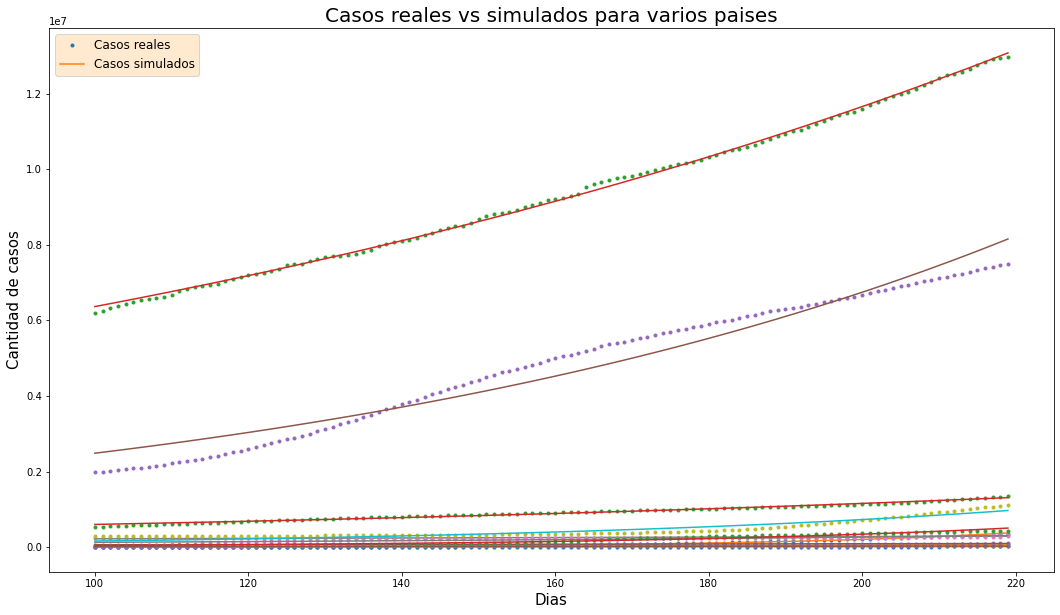

In [40]:
#Hacemos un for para no tener que copiar el código para cada pais.
pais = ['Argentina', 'Brazil', 'United States', 'Italy', 'United Kingdom', 'Japan', 'Russia', 'Sweden', 'Spain', 'South Korea',
          'Norway', 'Switzerland', 'Australia']
dia_inicio = 100
dia_fin = 220
k_paises=[]
plt.figure(figsize = (18,10))

for i in pais:
    ind=np.where(paises==i)
    ind=ind[0]
    casos=confirmados[ind]
    dias=np.arange(0,len(casos))
    casos_principio = casos[dia_inicio:dia_fin]
    dias_principio = dias[dia_inicio:dia_fin]
    
    popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev=5000) #con instancias que son valores nan, la funcion exponencial no corre
    #print('valores popt',popt)
    #print('valores pcov',pcov)

    k=popt[0]
    t0=popt[1]
    k_paises.append(k)
    print("Valor de k para", i,":", k)
    
    casos_simu=exponencial(dias_principio,k,t0)
    plt.title('Casos reales vs simulados para varios paises', fontsize=20)
    plt.plot(dias_principio,casos_principio,'.')
    plt.plot(dias_principio,casos_simu)
    plt.legend(['Casos reales', 'Casos simulados'], fontsize=12, facecolor='bisque')
    plt.xlabel('Dias', fontsize=15)
    plt.ylabel('Cantidad de casos', fontsize=15)
    
#print(t0)

-Generar un intervalo de confianza para el valor k midiéndolo para varios paises, con el objetivo de respresentar la población mundial con la selección que hagas.

In [41]:
mu_k=np.mean(k_paises)
sigma_k=np.std(k_paises)
print(mu_k)
print(sigma_k)

0.01076347748311026
0.007901584470197235


In [42]:
z=1.96 #con este z el nivel de confianza es del 95 % para dos colas o 97,5 % para una cola
n=len(k_paises)
int_conf=[mu_k-z*sigma_k/np.sqrt(n),mu_k+z*sigma_k/np.sqrt(n)]
print('Intervalo de confianza para periodo de 100 a 220:', int_conf)
print('Valor de k para World:', k_world)

Intervalo de confianza para periodo de 100 a 220: [0.006468127236123803, 0.015058827730096718]
Valor de k para World: 0.015724495833072432


C. Responde. ¿Con qué criterio elegiste los países para elaborar el intervalo de confianza?

El criterio utilizado para la elección de los países fue más de uno: 

El primero fue seleccionar países del hemisferio norte que es donde comenzo la pandemia, aunque también sumamos Argentina, Brasil o Australia del hemisferio sur para ver como fue el crecimiento de los casos en esa parte del mundo.

Un segundo criterio utilizado fue elegir países que hayan utilizado diferentes medidas o estrategias para combatir la pandemia, por ejemplo, países como Brasil, Estados Unidos, Rusia y Suecia no realizaron cuarentenas tan estrictas o a nivel nacional. En el caso de España o Italia, realizaron una cuarentena muy estricta a partir de que presentaban una gran cantidad de casos y en aumento de manera importante. Otro caso diferentes a los anteriores es el de Argentina, que llevo adelante una cuarentena estricta por un periodo bastante prolongado sin tener muchas casos confirmados hasta avanzada la pandemia.

Y un tercer criterio fue seleccionar países con culturas diferentes, por ejemplo, países asiáticos como Japón o Corea del Sur son mas ordenados y disciplinados que otras partes del mundo.

D. Responde. ¿El k promedio que mediste a partir de una población de países, sirve para representar a la población mundial? Justifica

In [43]:
print('Intervalo de confianza:', int_conf)
print('Valor de k para World:', k_world)   

Intervalo de confianza: [0.006468127236123803, 0.015058827730096718]
Valor de k para World: 0.015724495833072432


Como se puede ver, el valor de k para el mundo se ubica por fuera del intervalo de confianza calculado, por lo que podríamos concluir que el k que medimos a partir de la población de países seleccionados no serviría para representar a la población mundial, por lo menos en el periodo de tiempo evaluado a partir del cual se obtuvieron los k.

Ahora obtenemos el valor k de los países seleccionados para el segundo periodo de tiempo utilizado para evaluar, que va desde los 20 a los 80 días posteriores a la toma de datos.

Valor de k para Argentina : 0.12010891006473508
Valor de k para Brazil : 0.02695208776022082
Valor de k para United States : 0.03240453330917373
Valor de k para Italy : 0.021066948775309496
Valor de k para United Kingdom : 0.009930771977346972
Valor de k para Japan : 0.062322325248610526
Valor de k para Russia : 0.053679968518146784
Valor de k para Sweden : 0.026232137292464864
Valor de k para Spain : 0.02409506144650256
Valor de k para South Korea : 0.024864124434374243
Valor de k para Norway : 0.002635735049792225
Valor de k para Switzerland : 0.0029653410385503116
Valor de k para Australia : 0.0017767087812921092


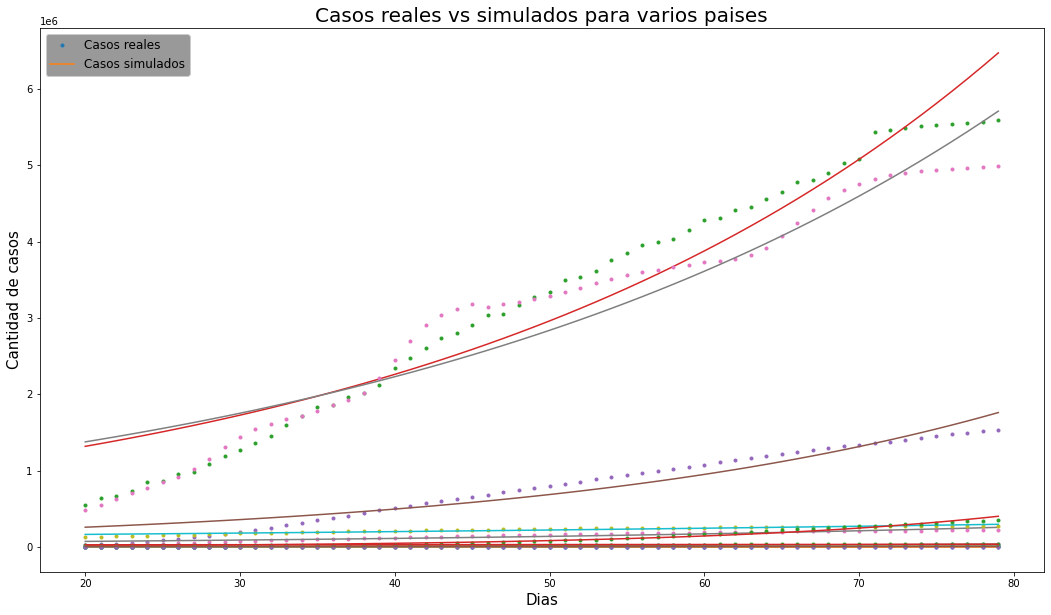

In [44]:
#Hacemos un for para no tener que copiar el código para cada pais.
pais = ['Argentina', 'Brazil', 'United States', 'Italy', 'United Kingdom', 'Japan', 'Russia', 'Sweden', 'Spain', 'South Korea',
          'Norway', 'Switzerland', 'Australia']
dia_inicio = 20
dia_fin = 80
k_paises_2=[]
plt.figure(figsize = (18,10))

for i in pais:
    ind=np.where(paises==i)
    ind=ind[0]
    casos=confirmados[ind]
    dias=np.arange(0,len(casos))
    casos_principio = casos[dia_inicio:dia_fin]
    dias_principio = dias[dia_inicio:dia_fin]
    
    popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev=5000) #con instancias que son valores nan, la funcion exponencial no corre
    #print('valores popt',popt)
    #print('valores pcov',pcov)

    k=popt[0]
    t0=popt[1]
    k_paises_2.append(k)
    print("Valor de k para", i,":", k)
    
    casos_simu=exponencial(dias_principio,k,t0)
    plt.title('Casos reales vs simulados para varios paises', fontsize=20)
    plt.plot(dias_principio,casos_principio,'.')
    plt.plot(dias_principio,casos_simu)
    plt.legend(['Casos reales', 'Casos simulados'], fontsize=12, facecolor='grey')
    plt.xlabel('Dias', fontsize=15)
    plt.ylabel('Cantidad de casos', fontsize=15)
    
#print(t0)

Generar un intervalo de confianza para el valor k midiéndolo para varios paises, con el objetivo de respresentar la población mundial con la selección que hagas.

In [45]:
mu_k_2=np.mean(k_paises_2)
sigma_k_2=np.std(k_paises_2)
#print(mu_k_2)
#print(sigma_k_2)

n_2=len(k_paises_2)
int_conf_2=[mu_k_2-z*sigma_k_2/np.sqrt(n_2),mu_k_2+z*sigma_k_2/np.sqrt(n_2)]
print('Intervalo de confianza para periodo de tiempo de 20 a 80:', int_conf_2)
print('Valor de k para World:', k_world)

Intervalo de confianza para periodo de tiempo de 20 a 80: [0.014576343585349982, 0.048352064675653034]
Valor de k para World: 0.015724495833072432


El valor obtenido de k a partir de los mismos países pero para un periodo de tiempo diferente, o sea desde el día 20 al 80 posteriores al comienzo de la toma de datos, se ubica dentro del intervalo de confianza calculado. Entonces podríamos concluir con un nivel de confianza del 95 % que este valor de k obtenido sirve para para representar al de la población mundial.

E. Realiza al menos 2 gráficos que aporten información para el entendimiento e interpretación de los datos.

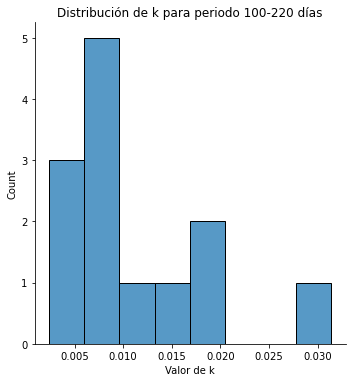

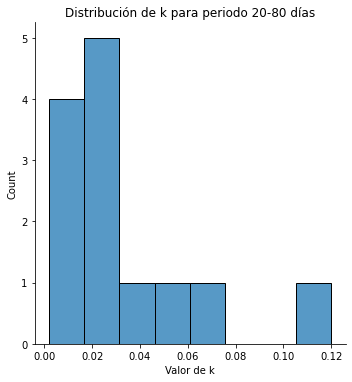

In [46]:
sns.displot(k_paises, bins=8)
plt.title('Distribución de k para periodo 100-220 días')
plt.xlabel('Valor de k')

sns.displot(k_paises_2, bins=8)
plt.title('Distribución de k para periodo 20-80 días')
plt.xlabel('Valor de k')
plt.show()

# EVALUANDO ESTRATEGIAS

F. Elige una politica pública para armar la clasificación y tres indicadores de la misma. Justifica por qué estos indicadores sirven.

G. Investiga sobre varios paises que hayan implementado o no la politica pública. Elige cinco que haya aplicado la politica y cinco que no, para luego construir el clasificador.

Comenzamos reemplazando los valores nan por un valor cercano a 0 para que se puedan hacer los cálculos de forma adecuada.

In [47]:
df_datos = datos.fillna(0.001)
#df_datos

Comenzamos agregando una nueva columna con los casos confirmados por día.

In [48]:
primero = True

for index, row in df_datos.iterrows():
    if primero:
        df_datos.loc[index, "Casos por día"] = df_datos.loc[index, "Total confirmed cases of COVID-19"]
        primero = False
    else:
        df_datos.loc[index, "Casos por día"] = df_datos.loc[index, "Total confirmed cases of COVID-19"] - df_datos.loc[index-1, "Total confirmed cases of COVID-19"]

df_datos

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día
0,Afghanistan,AFG,2020-03-23,0.001,0.001,1.000,40.0,40.0
1,Afghanistan,AFG,2020-03-24,0.001,0.001,1.000,42.0,2.0
2,Afghanistan,AFG,2020-03-25,0.001,0.001,1.000,74.0,32.0
3,Afghanistan,AFG,2020-03-26,0.001,0.001,2.000,80.0,6.0
4,Afghanistan,AFG,2020-03-27,0.001,0.001,2.000,91.0,11.0
...,...,...,...,...,...,...,...,...
135119,Zimbabwe,ZWE,2020-09-05,0.001,0.001,206.000,6837.0,6781.0
135120,Zimbabwe,ZWE,2021-12-05,0.001,0.001,4710.000,139046.0,132209.0
135121,Zimbabwe,ZWE,2020-03-20,0.001,0.001,0.001,1.0,-139045.0
135122,Zimbabwe,ZWE,2020-03-21,0.001,0.001,0.001,3.0,2.0


Ahora sumamos una columna con la diferencia de casos confirmados entre días consecutivos

In [49]:
primero = True

for index, row in df_datos.iterrows():
    if primero:
        df_datos.loc[index, "Variación casos"] = df_datos.loc[index, "Casos por día"]
        primero = False
    else:
        df_datos.loc[index, "Variación casos"] = df_datos.loc[index, "Casos por día"] - df_datos.loc[index-1, "Casos por día"]
        
df_datos

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos
0,Afghanistan,AFG,2020-03-23,0.001,0.001,1.000,40.0,40.0,40.0
1,Afghanistan,AFG,2020-03-24,0.001,0.001,1.000,42.0,2.0,-38.0
2,Afghanistan,AFG,2020-03-25,0.001,0.001,1.000,74.0,32.0,30.0
3,Afghanistan,AFG,2020-03-26,0.001,0.001,2.000,80.0,6.0,-26.0
4,Afghanistan,AFG,2020-03-27,0.001,0.001,2.000,91.0,11.0,5.0
...,...,...,...,...,...,...,...,...,...
135119,Zimbabwe,ZWE,2020-09-05,0.001,0.001,206.000,6837.0,6781.0,6762.0
135120,Zimbabwe,ZWE,2021-12-05,0.001,0.001,4710.000,139046.0,132209.0,125428.0
135121,Zimbabwe,ZWE,2020-03-20,0.001,0.001,0.001,1.0,-139045.0,-271254.0
135122,Zimbabwe,ZWE,2020-03-21,0.001,0.001,0.001,3.0,2.0,139047.0


Agregamos una tercer columna con una clasificación binaria según si aumentaron o disminuyeron los casos confirmados, o sea, cuando se dio un aumento de casos en comparacion con el dia anterior, se coloca el 0.

In [50]:
for index, row in df_datos.iterrows():
    if df_datos.loc[index, "Variación casos"] > 0: 
        df_datos.loc[index, "Binaria"] = 0 #indica aumento de casos
    else:
        df_datos.loc[index, "Binaria"] = 1 #indica disminución de casos
        
df_datos

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos,Binaria
0,Afghanistan,AFG,2020-03-23,0.001,0.001,1.000,40.0,40.0,40.0,0.0
1,Afghanistan,AFG,2020-03-24,0.001,0.001,1.000,42.0,2.0,-38.0,1.0
2,Afghanistan,AFG,2020-03-25,0.001,0.001,1.000,74.0,32.0,30.0,0.0
3,Afghanistan,AFG,2020-03-26,0.001,0.001,2.000,80.0,6.0,-26.0,1.0
4,Afghanistan,AFG,2020-03-27,0.001,0.001,2.000,91.0,11.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...
135119,Zimbabwe,ZWE,2020-09-05,0.001,0.001,206.000,6837.0,6781.0,6762.0,0.0
135120,Zimbabwe,ZWE,2021-12-05,0.001,0.001,4710.000,139046.0,132209.0,125428.0,0.0
135121,Zimbabwe,ZWE,2020-03-20,0.001,0.001,0.001,1.0,-139045.0,-271254.0,1.0
135122,Zimbabwe,ZWE,2020-03-21,0.001,0.001,0.001,3.0,2.0,139047.0,0.0


Eliminamos las columnas que no son de importancia para el análisis de lo datos para que sea más facil de leer.

In [51]:
df_datos.drop(['Code', 'total_tests', '142601-annotations'], axis=1, inplace=True)
#df_datos

Comenzamos armando el data para los 3 indicadores elegidos: cuarentena, restricciones en los viajes internacionales y vacunación.

In [52]:
df_vacunacion=pd.read_csv('C:/Users/juan_/Desktop/Acamica/Sprint4/covid-vaccination-policy.csv')
print(df_vacunacion.shape)
df_cuarentena=pd.read_csv('C:/Users/juan_/Desktop/Acamica/Sprint4/stay-at-home.csv')
print(df_cuarentena.shape)
df_viajes_int=pd.read_csv('C:/Users/juan_/Desktop/Acamica/Sprint4/international-travel.csv')
print(df_viajes_int.shape)

(136277, 4)
(136280, 4)
(136354, 4)


Eliminamos las columnas que no son de importancia.

In [53]:
df_vacunacion.drop(['Code'], axis=1, inplace=True)
df_cuarentena.drop(['Code'], axis=1, inplace=True)
df_viajes_int.drop(['Code'], axis=1, inplace=True)

In [54]:
#Vemos si elimino la columna Code
df_vacunacion

,Entity,Day,vaccination_policy
0,Afghanistan,2020-01-01,0
1,Afghanistan,2020-01-02,0
2,Afghanistan,2020-01-03,0
3,Afghanistan,2020-01-04,0
4,Afghanistan,2020-01-05,0
...,...,...,...
136272,Zimbabwe,2022-01-04,5
136273,Zimbabwe,2022-01-05,5
136274,Zimbabwe,2022-01-06,5
136275,Zimbabwe,2022-01-07,5


Ahora vamos agregando la columna de indicadores al dataset con el que venimos trabajando, anexando según coincida la fecha y el país.

In [55]:
df_datos2 = pd.merge(df_datos, df_cuarentena, on=['Day','Entity'])

In [56]:
df_datos2 = pd.merge(df_datos2, df_viajes_int, on=['Day','Entity'])

In [57]:
df_datos2 = pd.merge(df_datos2, df_vacunacion, on=['Day','Entity'])

In [58]:
#Imprimimos el data para ver como quedan anexadas las nuevas columnas
df_datos2

,Entity,Day,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos,Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
0,Afghanistan,2020-03-23,1.000,40.0,40.0,40.0,0.0,0,3,0
1,Afghanistan,2020-03-24,1.000,42.0,2.0,-38.0,1.0,0,3,0
2,Afghanistan,2020-03-25,1.000,74.0,32.0,30.0,0.0,2,3,0
3,Afghanistan,2020-03-26,2.000,80.0,6.0,-26.0,1.0,2,3,0
4,Afghanistan,2020-03-27,2.000,91.0,11.0,5.0,0.0,2,3,0
...,...,...,...,...,...,...,...,...,...,...
111484,Zimbabwe,2020-09-05,206.000,6837.0,6781.0,6762.0,0.0,2,4,0
111485,Zimbabwe,2021-12-05,4710.000,139046.0,132209.0,125428.0,0.0,2,2,5
111486,Zimbabwe,2020-03-20,0.001,1.0,-139045.0,-271254.0,1.0,0,1,0
111487,Zimbabwe,2020-03-21,0.001,3.0,2.0,139047.0,0.0,0,1,0


Ahora transformamos las diferentes categorias de los indicadores cuarentena, viajes internacionales y vacunación a binarias, por ejemplo, hubo cuarentena o no hubo cuarentena, cierre de viajes internacionales o se mantuvieron abiertos y hubo vacunación o no hubo vacunación. Ya que cada indicador tenia diferentes intensidad en la apliación del mismo, de lo cual surgían más de 2 categorias.

In [59]:
for index, row in df_datos2.iterrows():
    if df_datos2.loc[index, 'stay_home_requirements'] == 3: 
        df_datos2.loc[index, 'stay_home_requirements'] = 1 #Cuarentena
    else:
        df_datos2.loc[index, 'stay_home_requirements'] = 0 #No cuarentena

#Imprimimos el data para ver modifico el valor en las columnas       
#df_datos2

In [60]:
for index, row in df_datos2.iterrows():
    if df_datos2.loc[index, 'international_travel_controls'] == 4: 
        df_datos2.loc[index, 'international_travel_controls'] = 1 #Cierre de fronteras
    else:
        df_datos2.loc[index, 'international_travel_controls'] = 0 #Apertura de fronteras

#Imprimimos el data para ver modifico el valor en las columnas       
#df_datos2

In [61]:
for index, row in df_datos2.iterrows():
    if df_datos2.loc[index, 'vaccination_policy'] >= 4: 
        df_datos2.loc[index, 'vaccination_policy'] = 1 #Vacunación
    else:
        df_datos2.loc[index, 'vaccination_policy'] = 0 #No Vacunación

#Imprimimos el data para ver modifico el valor en las columnas
#df_datos2

# MODELO REGRESION LOGISTICA
https://www.aprendemachinelearning.com/regresion-logistica-con-python-paso-a-paso/

https://www.iartificial.net/como-usar-regresion-logistica-en-python/

H. Mide los indicadores que hayas elegido en los países del punto G. A partir de eso elabora modelos de regresión logística y úsalos para clasificar los datos de otros países nuevos.

Seleccionamos los datos de los países a los cúales les calculamos el k de primer etapa de crecimiento exponencial.

In [62]:
paises_selec = ['Argentina', 'Brazil', 'United States', 'Italy', 'United Kingdom', 'Japan', 'Russia', 'Sweden', 'Spain', 'South Korea',
                'Norway', 'Switzerland', 'Australia']
df_paises_selec = df_datos2[df_datos2['Entity'].isin(paises_selec)]
df_paises_selec

,Entity,Day,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos,Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
3220,Argentina,2020-01-01,0.001,0.001,-14.999,-14.999,1.0,0,0,0
3221,Argentina,2020-01-02,0.001,0.001,0.000,14.999,0.0,0,0,0
3222,Argentina,2020-01-03,0.001,0.001,0.000,0.000,1.0,0,0,0
3223,Argentina,2020-01-04,0.001,0.001,0.000,0.000,1.0,0,0,0
3224,Argentina,2020-01-05,0.001,0.001,0.000,0.000,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
106684,United States,2020-02-24,0.001,16.000,0.000,0.000,1.0,0,0,0
106685,United States,2020-02-25,0.001,16.000,0.000,0.000,1.0,0,0,0
106686,United States,2020-02-26,0.001,16.000,0.000,0.000,1.0,0,0,0
106687,United States,2020-02-27,0.001,17.000,1.000,1.000,0.0,0,0,0


In [63]:
df_paises_selec['Entity'].unique()

array(['Argentina', 'Australia', 'Brazil', 'Italy', 'Japan', 'Norway',
       'Russia', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom', 'United States'], dtype=object)

In [64]:
#Comenazmos definiendo las variables a utilizar como X e Y
X = df_paises_selec.drop(columns = ['Entity','Day','Total confirmed deaths due to COVID-19','Total confirmed cases of COVID-19','Casos por día','Variación casos','Binaria'], axis=1) #aca van los indicarotes/politicas
y = df_paises_selec['Binaria'] #cantidad de casos en binario
print(X.shape)
print(y.shape)

(8742, 3)
(8742,)


Luego definimos que porción de los datos seran utilizados para entrenamiento (train) y para evaluación (test).

In [65]:
#Hacemos el train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6119, 3) (6119,) (2623, 3) (2623,)


In [66]:
#creamos nuestro modelo de regresion logistica y lo entrenamos con los datos de entrenamiento
model_RL = LogisticRegression()
model_RL.fit(X_train,y_train)

LogisticRegression()

In [67]:
#hacemos las predicciones a partir de los indicadores seleccionados como X test
y_pred = model_RL.predict(X_test)
y_pred_prob = model_RL.predict_proba(X_test)
print(y_pred)
print(y_pred_prob)

[1. 1. 1. ... 1. 1. 1.]
[[0.46265734 0.53734266]
 [0.46265734 0.53734266]
 [0.46265734 0.53734266]
 ...
 [0.44292018 0.55707982]
 [0.46265734 0.53734266]
 [0.44292018 0.55707982]]


Ahora evaluamos como funciono el modelo a partir de diferentes metricas:

In [68]:
# Reporte total
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.16      0.24      1232
         1.0       0.53      0.84      0.65      1391

    accuracy                           0.52      2623
   macro avg       0.50      0.50      0.45      2623
weighted avg       0.50      0.52      0.46      2623



In [69]:
# Matriz de confusión de las predicciones de test

confusion_matrix = pd.crosstab(
    y_test, y_pred,
    rownames=['Real'],
    colnames=['Predicción'])
confusion_matrix

Predicción,0.0,1.0
Real,,
0.0,199,1033
1.0,220,1171


Conclusión: El modelo parece clasificar la categoria 1 bastante mejor que la categoria 0, ya que podemos ver que de los datos reales 1391 datos categoria 1, 1171 lo clasifica bien (84%); en cambio para la categoria 0 ese porcentaje es mucho menor, 16%. Igualmente tenemos que decir que el modelo en general no es bueno para hacer predicciones, esto puede observarse en la metrica F1 con un valor medio para clasificar la clase 1 y un valor muy bajo para clasificar la clase 0. Esto se debe a que para ambas clases la presición es cercana al 50%.

In [70]:
valor = model_RL.coef_
efectividad_cuarentena = valor[0][0]
efectividad_cierre_frontera = valor[0][1]
efectividad_vacunacion = valor[0][2]

print('La efectividad de la cuarentena fue del: ' + str(efectividad_cuarentena))
print('La efectividad del cierre de la frontera fue del: ' + str(efectividad_cierre_frontera))
print('La efectividad del la vacunación fue del: ' + str(efectividad_vacunacion))

La efectividad de la cuarentena fue del: -0.09238889205980418
La efectividad del cierre de la frontera fue del: -0.16558659856906013
La efectividad del la vacunación fue del: 0.07966964692313934


Ahora vamos a utilizar el modelo para clasificar los datos de otros países nuevos.

In [71]:
paises_nuevos = ['France', 'India', 'Chile', 'Colombia', 'Canada']
df_paises_nuevos = df_datos2[df_datos2['Entity'].isin(paises_nuevos)]
df_paises_nuevos

,Entity,Day,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos,Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
18005,Canada,2020-01-31,0.001,4.0,-62.0,-72.0,1.0,0,0,0
18006,Canada,2020-02-08,0.001,7.0,3.0,65.0,0.0,0,0,0
18007,Canada,2020-02-16,0.001,7.0,0.0,-3.0,1.0,0,0,0
18008,Canada,2020-02-21,0.001,9.0,2.0,2.0,0.0,0,0,0
18009,Canada,2020-02-24,0.001,10.0,1.0,-1.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
46318,India,2020-03-06,0.001,31.0,1.0,-1.0,1.0,0,0,0
46319,India,2020-03-07,0.001,34.0,3.0,2.0,0.0,0,0,0
46320,India,2020-03-08,0.001,39.0,5.0,2.0,0.0,0,0,0
46321,India,2020-03-09,0.001,43.0,4.0,-1.0,1.0,0,0,0


In [72]:
#Comenazmos definiendo las variables a utilizar
X_nuevo = df_paises_nuevos.drop(columns = ['Entity','Day','Total confirmed deaths due to COVID-19','Total confirmed cases of COVID-19','Casos por día','Variación casos','Binaria'], axis=1) #aca van los indicarotes/politicas
y_nuevo = df_paises_nuevos['Binaria'] #cantidad de casos en binario
print(X_nuevo.shape)
print(y_nuevo.shape)

(3329, 3)
(3329,)


In [73]:
#hacemos las predicciones a partir de los indicadores seleccionados ingresados como X
y_pred_nuevo = model_RL.predict(X_nuevo)
print(y_pred_nuevo)
y_pred_nuevo_prob = model_RL.predict_proba(X_nuevo)
print(y_pred_nuevo_prob)

[1. 1. 1. ... 1. 1. 1.]
[[0.46265734 0.53734266]
 [0.46265734 0.53734266]
 [0.46265734 0.53734266]
 ...
 [0.46265734 0.53734266]
 [0.46265734 0.53734266]
 [0.46265734 0.53734266]]


In [74]:
# Reporte total
print(classification_report(y_nuevo, y_pred_nuevo))

              precision    recall  f1-score   support

         0.0       0.50      0.40      0.45      1563
         1.0       0.55      0.64      0.59      1766

    accuracy                           0.53      3329
   macro avg       0.52      0.52      0.52      3329
weighted avg       0.52      0.53      0.52      3329



In [75]:
# Matriz de confusión de las predicciones de test
confusion_matrix = pd.crosstab(
    y_nuevo, y_pred_nuevo,
    rownames=['Real'],
    colnames=['Predicción'])
confusion_matrix

Predicción,0.0,1.0
Real,,
0.0,631,932
1.0,637,1129


Conclusión: El modelo para los datos de países nuevos tuvo un desempeño similar. Esto se puede observar a partir de la cantidad de datos que clasifica como 1 (disminución de casos) o 0 (aumento de casos) en funcion de su etiqueta real, el porcentaje de datos bien clasificados es alrededor del 50% para las dos categorias. Algo para remarcar es que el recall (exahustividad) de la categoria 0 mejora considerablemente y baja el valor para la categoria 1. En resumen el modelo clasifica algo mejor los datos que marcan una disminución de los casos (1) que los que marcan un aumento de los mismos (0).

### OPTIMIZACION DE HIPERPARAMETROS

A partir del modelo de regresión logística utilizado anteriormente, vamos a realizar una optimización de hiperpáramtros para ver si mejora la performance y obtener un nuevo modelo que nos permita hacer una mejora en la evaluación.

In [76]:
#Grilla de Grid Search para modelo de regresión logística.
param_reglog = {'penalty': ['l2', 'l1', 'elasticnet', 'none'],
               'fit_intercept': [True, False],
                'C': [0.1, 0.5, 1, 5, 10, 20]}

In [77]:
#Hacemos el Grid Search con la grilla definida arriba
model_RegLog = GridSearchCV(model_RL, param_grid=param_reglog, cv=5)

In [78]:
# Entrenamos
model_RegLog.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 20],
                         'fit_intercept': [True, False],
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']})

In [79]:
print("Mejores parametros: "+str(model_RegLog.best_params_))
print("Mejor Score: "+str(model_RegLog.best_score_)+'\n')

scores_RegLog = pd.DataFrame(model_RegLog.cv_results_)
scores_RegLog

Mejores parametros: {'C': 0.1, 'fit_intercept': True, 'penalty': 'l2'}
Mejor Score: 0.5344004350172884



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015068,0.003774,0.000000,0.000000,0.1,True,l2,"{'C': 0.1, 'fit_intercept': True, 'penalty': '...",0.526144,0.535948,0.534314,0.544935,0.530662,0.534400,0.006253,1
1,0.000798,0.000399,0.000000,0.000000,0.1,True,l1,"{'C': 0.1, 'fit_intercept': True, 'penalty': '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
2,0.001397,0.000489,0.000000,0.000000,0.1,True,elasticnet,"{'C': 0.1, 'fit_intercept': True, 'penalty': '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
3,0.021172,0.005949,0.000598,0.001197,0.1,True,none,"{'C': 0.1, 'fit_intercept': True, 'penalty': '...",0.526144,0.535948,0.534314,0.544935,0.530662,0.534400,0.006253,1
4,0.018118,0.002861,0.001194,0.001928,0.1,False,l2,"{'C': 0.1, 'fit_intercept': False, 'penalty': ...",0.484477,0.504902,0.486111,0.491013,0.505315,0.494364,0.009034,13
5,0.000000,0.000000,0.000000,0.000000,0.1,False,l1,"{'C': 0.1, 'fit_intercept': False, 'penalty': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
6,0.000000,0.000000,0.000000,0.000000,0.1,False,elasticnet,"{'C': 0.1, 'fit_intercept': False, 'penalty': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
7,0.014598,0.008353,0.003162,0.006324,0.1,False,none,"{'C': 0.1, 'fit_intercept': False, 'penalty': ...",0.484477,0.504902,0.486111,0.491013,0.499591,0.493219,0.007860,14
8,0.018926,0.004860,0.000194,0.000388,0.5,True,l2,"{'C': 0.5, 'fit_intercept': True, 'penalty': '...",0.526144,0.535948,0.534314,0.544935,0.530662,0.534400,0.006253,1
9,0.000798,0.000746,0.000000,0.000000,0.5,True,l1,"{'C': 0.5, 'fit_intercept': True, 'penalty': '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,34


In [80]:
print("Mejores parametros: "+str(model_RegLog.best_estimator_))

model_RegLog_2 = model_RegLog.best_estimator_

Mejores parametros: LogisticRegression(C=0.1)


In [81]:
#hacemos las predicciones a partir de los indicadores seleccionados como X test
y_pred_2 = model_RegLog_2.predict(X_test)
print(y_pred_2)

[1. 1. 1. ... 1. 1. 1.]


In [82]:
# Reporte total
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

         0.0       0.47      0.16      0.24      1232
         1.0       0.53      0.84      0.65      1391

    accuracy                           0.52      2623
   macro avg       0.50      0.50      0.45      2623
weighted avg       0.50      0.52      0.46      2623



In [83]:
# Matriz de confusión de las predicciones de test
confusion_matrix = pd.crosstab(
    y_test, y_pred_2,
    rownames=['Real'],
    colnames=['Predicción'])
confusion_matrix

Predicción,0.0,1.0
Real,,
0.0,199,1033
1.0,220,1171


Luego de hacer la optimización de hiperpárametros y probar los datos que teníamos como test, vemos que lo modelo sigue teniendo la misma performance que el utilizado al comienzo con los parametros por default. Entonces la optimización no mejoró el modelo y sigue clasificando los datos con una performance bastante baja, a pesar que clasifica mejor los datos que muestran una disminucion de los casos (1) en comparación con los datos que muestran un aumento de los casos (0).

I.Responde. ¿Que clasificadores funcionan mejor? ¿Por qué?

Los modelos o clasificadores tienen un funcionamiento regular, ya que como hemos explicado anteriormente la performance de los modelos es algo superior al 50%, clasificando mejor los datos de disminución de casos (1) que los datos que corresponden a aumento de casos (0). En cuanto a clasificar la categoria 1 (disminución de casos) es bueno porque tiene alta sensibilidad (recall) lo que indica que se le escapan pocos datos, o sea que la mayoría de los datos categoria 1 (disminución de casos) los clasifica como 1, pero pierde prescición porque aunque se le escapan pocos categoria 1, clasifica muchos datos que en realidad son categoria 0 (aumento de casos) como categoria 1 (disminución de casos), y esto es lo que hacer que pierda prescición. 

# INVESTIGACION

J. Plantea nuevas preguntas en base al trabajo que hiciste y en las que se pueda ahondar.

-¿Utilizar periodos de tiempo más cortos para el cálculo del factor k de crecimiento exponencial de los casos sería mejor o brindarnos datos más confiables que periodos de tiempo más extensos?

-¿A partir de analizar a los países en periodos de tiempo distintos nos podría dar valores de k mas aplicables a la población mundial?

-¿Utilizar datos de regiones o continentes que no se tuvieron en cuenta como Africa o Medio Oriente podrían mejorar o empeorar los resultados? Ya que puede ser que en algunos casos la toma de datos o información no sea suficiente o sea la adecuada?

-¿Utilizar los datos de muertes confirmadas en lugar de casos confirmados y evaluarlos a través de los mismos indicadores (cuarentena, cierre de viajes internacionales y vacunación), podría mejorar el desempeño de los modelos?

-¿Elegir otros indicadores serían mejores para evaluar las diferentes politicas públicas y mejorararían el desempeño de los modelos?

K. Elabora un informe con todo lo que hiciste.

Comenzamos viendo la información que tenia el dataset, o sea, la informacíon que contenía cada columna y como estaba distribuida, ver la presencia de datos faltantes y ver si lo mejor era reemplazarlos o eliminar esas instancias, optamos por el reemplazo de los valores nan porque parecia que estaban asociados al valor 0 de casos confirmados y muertes por Covid-19.
Luego utilizamos la columna de casos confirmados para analizar como se desarrollo la pandemia en el mundo y en algunos países seleccionados teniendo en cuenta algunos criterios como hemisferio norte-sur, diferentes politicas o medidas de como enfrentarse a la pandemia. Otro criterio utilizado fue seleccionar países con diferentes culturas para ver como reaccionaban frente a diferentes restricciones.
Obtuvimos un valor de k para los países seleccionados con los criterios descriptos anteriormente, y así poder analizar si servía para representar el k de la población mundial utilizando un intervalo de confianza. A partir de esto, podemos concluir que dependiendo del periodo de tiempo utilizado, el valor de k obtenido podría servir o no para respresentar el de la población mundial. Posiblemente si se buscaba la primer etapa de crecimiento exponencial para cada pais por separado y también incluir en la lista otros países o mayor cantidad, los resultados seguramente serían diferentes y nos hubiesen permitido sacar otras conclusiones, queda pendiente para un análisis futuro.

En la segunda parte del informe 'Evaluando estrategias' elegimos tres indicadores como cuarentena, cierre de viajes internacionales y politicas de vacunación para ver como influían en el desarrollo de la pandemia en países que habian utilizado diferentes politicas públicas para combatirla. Estos indicadores tenian diferentes grados de intensidad en su aplicación, por lo que tuve que modificarlos a una categoria binaria, por ejemplo, hubo cuarentena o no hubo cuarentena, hubo cierred de viajes internacionales o se mantuvieron abiertos y hubo vacunación o no hubo vacunación.
Una vez terminado con el agregado de los datos al dataset de trabajo, seleccionamos los datos de los mismos países utilizados en la primera parte del proyecto para ingresarlos en un modelo de regresión logistica y evaluar su desempeño. Este modelo es probado con datos de países nuevos y los resultados no son buenos, ya que nos muestra que clasifica mejor una de las dos categorias, o sea, el modelo funciona mejor clasificando los datos cuando estan dismimunyendo los casos (1), mientras que cuando tiene datos que corresponden a un aumento de los casos (0) tiene más error, es bueno aclarar que aunque clasifique mejor una categoria que otra, en el global la performance del modelo es regular a mala ya que clasifica bien solo un poco mas del 50% de los datos. Luego de probar el modelo con datos de países nuevos, hacemos una optimización de hiperparámetros con un Grid Search para ver si mejora el desempeño del modelo pero no logramos mejorarlo, por lo que nos quedamos con el modelo con los parámetros por default.

Luego de ver que el desempeño de los modelos fue regular o malo, explicaremos a que creemos que se debe esto. Pensamos que esta relacionado a como trasladamos a binario la columnas de los diferentes indicadores que utilizamos: cuarentena, cierre en los viajes internacionales y politicas de vacunación.
Cada indicador tenía diferente intensidad en la apliación de si mismo, y esto lo explicaremos tomando el ejemplo de cuarentena (stay at home) que presentaba cuatro categorias: 0 (sin restricciones), 1 (pocas restricciones), 2 (restricciones medias) y 3 (muchas restricciones). Lo que hicimos fue transformar estas cuatro categorias en solo dos, o sea, 0 NO hubo cuarentena (donde se tuvieron en cuenta las categorias 0 (sin restricciones), 1 (pocas restricciones) y 2 (restricciones medias); y la 1 hubo cuarentena (donde se tuvo en cuenta solo la categoria 3 (muchas restricciones)). Para el caso de Argentina vimos que, luego de la transformación de los datos a dos categorias (hubo cuarentena o NO hubo cuarentena), el periodo de tiempo en el cual quedaba con cuarentena fue solo de unas pocas semanas que iban de mediados de Marzo de 2020 a fines de Abril de 2020, respresentando una parte muy pequeña del total de los datos, ya que teniamos hasta diciembre de 2021. Encima este periodo que consideramos como cuarentena fue al comienzo de la pandemia, que para el caso de Argentina la cantidad de casos era  muy baja pero posiblemente se hayan mantenido en aumento durante la duración de la cuarentena. Es muy probable que esto nos haya ocurrido para otros países y para los otros indicadores como politicas de vacunación y cierre de viajes internacionales.

Como conclusión final, se podría llevar los mismos indicadores elegidos a una categoria binaria pero modificando el criterio utilizado para transformar las categorias o intensidades iniciales en la apliación de dicho indicador. Obtendríamos un dataset muy diferente al utilizado en este proyecto y aplicarlo para los modelos de regresión logistica creados, y es muy probable que los resultados sean diferentes.

Link donde se descargaron los datos de los indicadores utilizados en el informe:
    
https://ourworldindata.org/policy-responses-covid

In [84]:
#https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/
#Alta precision y alto recall: el modelo maneja perfectamente esa clase
#Alta precision y bajo recall: el modelo no detecta la clase muy bien, pero cuando lo hace es altamente confiable.
#Baja precisión y alto recall: La clase detecta bien la clase pero también incluye muestras de otras clases.
#aja precisión y bajo recall: El modelo no logra clasificar la clase correctamente.